In [3]:
# Load necessary libraries

import pandas as pd
from bs4 import BeautifulSoup
import requests 
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Read url from web page and save in "url" variable. Pass url in "request.get()" function and save it in "response". 
# Save the response in "soup" object of BeautifulSoup. 
url = "https://en.wikipedia.org/wiki/Obesity_in_the_United_States"
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')

In [16]:
# Find all 'table' tags in soup object to find all tables from wiki page. Verify total number of tables on wiki 
# source code by finding "<table". There are 13 tables. 
total_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(total_tables)))

Total number of tables are 14 


In [17]:
# Find wiki tables in the soup object by searching for class of 'wikitable'. 
# Make sure the type is "Tag" for the output.
right_table = soup.find("table", {"class": "wikitable"})
print(type(right_table))

<class 'bs4.element.Tag'>


In [18]:
# Since there is only one wikitable, extract the table headers and confirm the number of columns using len() function. 
header_data = right_table.tbody.findAll('tr', recursive=False)[0]
header_name_list = [th for th in header_data.findAll('th')]
print(len(header_name_list))

6


In [19]:
# Extract the text from header_name_list and strip whitespaces. Store the data in headers list and print the list.
headers = [source.getText().strip() for source in header_name_list]
print(headers)

['States, district, & territories', 'Obesity rank', 'Obese adults (mid-2000s)', 'Obese adults (2020)[80][75][81]', 'Overweight (incl. obese) adults(mid-2000s)', 'Obese children and adolescents(mid-2000s)[82]']


In [20]:
# Get table rows from right_table and store in rows. Search for table data for each row and store
# the results in data_rows. Create a data frame using data_rows and headers. Use head() to check first few rows.
rows = right_table.findAll('tbody')[0].findAll('tr')[1:]
data_rows = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows]
obesity_df = pd.DataFrame(data_rows, columns=headers)
obesity_df.head()

,"States, district, & territories",Obesity rank,Obese adults (mid-2000s),Obese adults (2020)[80][75][81],Overweight (incl. obese) adults(mid-2000s),Obese children and adolescents(mid-2000s)[82]
0,Alabama,5,30.1%,36.3%,65.4%,16.7%
1,Alaska,9,27.3%,34.2%,64.5%,11.1%
2,American Samoa,—,—,75%[79],95%[83],35%[79][84]
3,Arizona,30,23.3%,29.5%,59.5%,12.2%
4,Arkansas,7,28.1%,35.0%,64.7%,16.4%


In [21]:
# Check the size of the dataframe using shape function
obesity_df.shape

(56, 6)

# Replace Headers

In [22]:
# Check for all headers in dataframe
obesity_df.columns

Index(['States, district, & territories', 'Obesity rank',
       'Obese adults (mid-2000s)', 'Obese adults (2020)[80][75][81]',
       'Overweight (incl. obese) adults(mid-2000s)',
       'Obese children and adolescents(mid-2000s)[82]'],
      dtype='object')

In [23]:
# Below 4 headings are changed with more relevent headings:
# Obese adults (mid-2000s)
# Obese adults (2020)[78][73][79]
# Overweight (incl. obese) adults(mid-2000s)
# Obese children and adolescents(mid-2000s)[80]

obesity_df.rename(columns={"Obese adults (mid-2000s)": "Obese adults (2000)", 
                           "Obese adults (2020)[80][75][81]": "Obese adults (2020)", 
                           "Overweight (incl. obese) adults(mid-2000s)": "Overweight adults (2000)",
                           "Obese children and adolescents(mid-2000s)[82]": "Obese children and adolescents (2000)"}, 
                            inplace=True)

obesity_df.columns

Index(['States, district, & territories', 'Obesity rank',
       'Obese adults (2000)', 'Obese adults (2020)',
       'Overweight adults (2000)', 'Obese children and adolescents (2000)'],
      dtype='object')

# Find duplicates

In [24]:
# Find duplicates in all columns. 

print("States, district, & territories - {}".format(any(obesity_df['States, district, & territories'].duplicated())))
print("Obesity rank - {}".format(any(obesity_df['Obesity rank'].duplicated())))
print("Obese adults (2000) - {}".format(any(obesity_df['Obese adults (2000)'].duplicated())))
print("Obese adults (2020) - {}".format(any(obesity_df['Obese adults (2020)'].duplicated())))
print("Overweight adults (2000) - {}".format(any(obesity_df['Overweight adults (2000)'].duplicated())))
print("Obese children and adolescents (2000)  - {}".format(any(obesity_df['Obese children and adolescents (2000)'].duplicated())))

States, district, & territories - False
Obesity rank - True
Obese adults (2000) - True
Obese adults (2020) - True
Overweight adults (2000) - True
Obese children and adolescents (2000)  - True


In [25]:
# apart from "States, district, & territories" column, all other columns can have duplicates, so no action needed. 

# Identify outliers and bad data

In [26]:
# find Null values in dataframe and find total of the Null values
obesity_df.isnull().sum()

States, district, & territories          0
Obesity rank                             0
Obese adults (2000)                      0
Obese adults (2020)                      0
Overweight adults (2000)                 0
Obese children and adolescents (2000)    0
dtype: int64

In [27]:
# No action is needed to remove null values as there are no null values

In [28]:
# Look for bad data using head() function

In [29]:
obesity_df.head()

,"States, district, & territories",Obesity rank,Obese adults (2000),Obese adults (2020),Overweight adults (2000),Obese children and adolescents (2000)
0,Alabama,5,30.1%,36.3%,65.4%,16.7%
1,Alaska,9,27.3%,34.2%,64.5%,11.1%
2,American Samoa,—,—,75%[79],95%[83],35%[79][84]
3,Arizona,30,23.3%,29.5%,59.5%,12.2%
4,Arkansas,7,28.1%,35.0%,64.7%,16.4%


In [30]:
# Check the size of the dataframe before removing rows
obesity_df.shape

(56, 6)

In [31]:
# remove rows where obesity rank is "—"
obesity_df=obesity_df[obesity_df['Obesity rank'] != '—']

In [32]:
# Check the size of the dataframe after removing rows
obesity_df.shape

(51, 6)

In [33]:
# Five rows were removed.

# Use matplotlib to check outliers for "Obese adults (2000)", "Obese adults (2020)", "Overweight adults (2000)", 
# and "Obese children and adolescents (2000)" columns

In [34]:
# Since the values should be int or float for plotting, remove % value from the string and convert then to float

obesity_df['Obese adults (2000)'] = obesity_df['Obese adults (2000)'].str.replace('%','')
obesity_df['Obese adults (2020)'] = obesity_df['Obese adults (2020)'].str.replace('%','')
obesity_df['Overweight adults (2000)'] = obesity_df['Overweight adults (2000)'].str.replace('%','')
obesity_df['Obese children and adolescents (2000)'] = obesity_df['Obese children and adolescents (2000)'].str.replace('%','')
obesity_df['Obese adults (2000)'] = obesity_df['Obese adults (2000)'].astype(float)
obesity_df['Obese adults (2020)'] = obesity_df['Obese adults (2020)'].astype(float)
obesity_df['Overweight adults (2000)'] = obesity_df['Overweight adults (2000)'].astype(float)
obesity_df['Obese children and adolescents (2000)'] = obesity_df['Obese children and adolescents (2000)'].astype(float)
obesity_df.head()

,"States, district, & territories",Obesity rank,Obese adults (2000),Obese adults (2020),Overweight adults (2000),Obese children and adolescents (2000)
0,Alabama,5,30.1,36.3,65.4,16.7
1,Alaska,9,27.3,34.2,64.5,11.1
3,Arizona,30,23.3,29.5,59.5,12.2
4,Arkansas,7,28.1,35.0,64.7,16.4
5,California,48,23.1,25.1,59.4,13.2


{'whiskers': [<matplotlib.lines.Line2D at 0x20cff5dcd90>,
 'caps': [<matplotlib.lines.Line2D at 0x20cff5f3490>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cff5dca30>],
 'medians': [<matplotlib.lines.Line2D at 0x20cff5f3b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cff5f3e50>],
 'means': []}

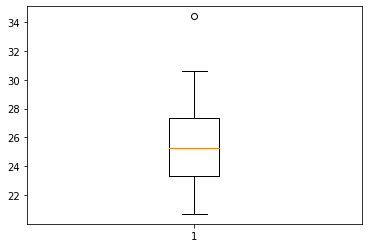

In [35]:
# plot the box plot to view outliers for 'Obese adults (2000)'.  
plt.boxplot(obesity_df['Obese adults (2000)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20cff680d30>,
 'caps': [<matplotlib.lines.Line2D at 0x20cff68d430>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cff680a90>],
 'medians': [<matplotlib.lines.Line2D at 0x20cff68daf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cff68ddf0>],
 'means': []}

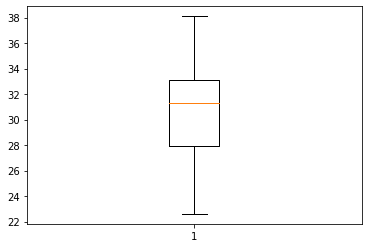

In [36]:
# plot the box plot to view outliers for 'Obese adults (2020)'.  
plt.boxplot(obesity_df['Obese adults (2020)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20cff6eb880>,
 'caps': [<matplotlib.lines.Line2D at 0x20cff6ebf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cff6eb5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20cff6f8640>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cff6f8910>],
 'means': []}

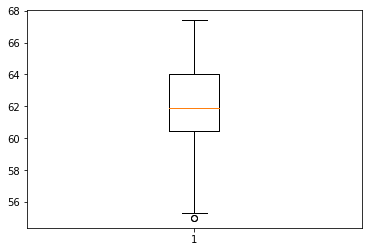

In [37]:
# plot the box plot to view outliers for 'Overweight adults (2000)'.  
plt.boxplot(obesity_df['Overweight adults (2000)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20cff6ac5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20cff649460>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cff6aca60>],
 'medians': [<matplotlib.lines.Line2D at 0x20cff6388e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cff638910>],
 'means': []}

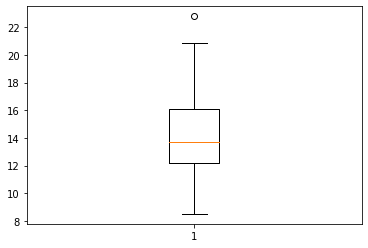

In [38]:
# plot the box plot to view outliers for 'Obese children and adolescents (2000)'.  
plt.boxplot(obesity_df['Obese children and adolescents (2000)'])

In [39]:
# While there are outliers for three columns, it is necessary to keep them in the data frame for further comparison and 
# analysis. Not removing outliers at this time.

# Format data into a more readable format

In [40]:
# check the dataframe for readable format
obesity_df.head()

,"States, district, & territories",Obesity rank,Obese adults (2000),Obese adults (2020),Overweight adults (2000),Obese children and adolescents (2000)
0,Alabama,5,30.1,36.3,65.4,16.7
1,Alaska,9,27.3,34.2,64.5,11.1
3,Arizona,30,23.3,29.5,59.5,12.2
4,Arkansas,7,28.1,35.0,64.7,16.4
5,California,48,23.1,25.1,59.4,13.2


In [41]:
# all data in the dataframe is in readable format, no need to change the format

# Fix casing or inconsistent values

In [42]:
# check the dataframe for casing and inconsistent values
obesity_df.head()

,"States, district, & territories",Obesity rank,Obese adults (2000),Obese adults (2020),Overweight adults (2000),Obese children and adolescents (2000)
0,Alabama,5,30.1,36.3,65.4,16.7
1,Alaska,9,27.3,34.2,64.5,11.1
3,Arizona,30,23.3,29.5,59.5,12.2
4,Arkansas,7,28.1,35.0,64.7,16.4
5,California,48,23.1,25.1,59.4,13.2


In [43]:
# all data in the dataframe is in proper format and consistent, no need to change the casing or incosistencies

In [44]:
obesity_df.to_csv('obesity.csv', index=False)